**To-Do**
Draw image of each digit
get the distinct keys from dataset 
get the index positions in train data 
using g = plt.imshow(X_train[0][:,:,0]) - draw the diagram 

In [0]:
def get_digits_data(data):
    test = data.drop_duplicates('label')
    return test

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd

train_data = pd.read_csv('gdrive/My Drive/HW_1/train.csv')
test_data = pd.read_csv('gdrive/My Drive//HW_1/test.csv')

Y_train = train_data["label"]
X_train = train_data.drop("label", axis=1)

#print(test_data)
#Y_test = test_data["label"]
#X_test = test_data.drop("label", axis=1)

In [4]:
data_all_digits = get_digits_data(train_data)
train_data.shape

(42000, 785)

In [0]:
import matplotlib.pyplot as plt 
import numpy as np

j = 1
def print_image(x_val):
    x_val = np.array(x_val)
    reshaped_mat = x_val.reshape((28,28))
    global j
    plt.subplot(2,5, j)
    j = j + 1
    g = plt.imshow(reshaped_mat, cmap = 'gray')
    return

In [0]:
data_all_digits = data_all_digits.drop("label", axis=1)

0     None
1     None
3     None
6     None
7     None
8     None
10    None
11    None
16    None
21    None
dtype: object

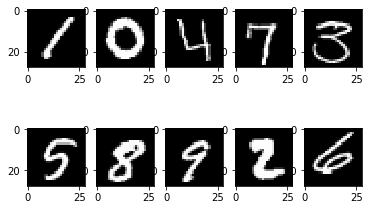

In [7]:
data_all_digits.apply(print_image, axis =1)

Measure the distribution over the labels in the training data. (Hint: This is often called
the prior probability of the classes). Report whether each label is uniformly distributed
across the training examples.

In [0]:
distribution = Y_train.value_counts(normalize=True)


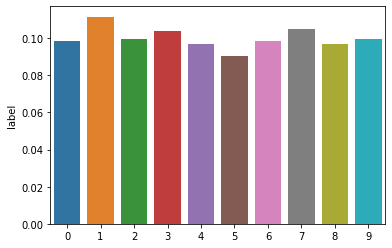

In [9]:
import seaborn
seaborn.barplot(x=distribution.index, y=distribution)

In [10]:
# Standarize the data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
random_seed = 3
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

train_img, test_img, train_lbl, test_lbl = train_test_split(
    X_train, Y_train, test_size=1/7.0, random_state=122)

train_samples = train_img.shape[0]

model_1 = LogisticRegression(
    C=50. / train_samples, penalty='l1', solver='saga', tol=0.1, class_weight='balanced')

model_1.fit(train_img, train_lbl)

LogisticRegression(C=0.001388888888888889, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.1, verbose=0,
                   warm_start=False)

In [0]:
sparsity = np.mean(model_1.coef_ == 0) * 100
score = model_1.score(test_img, test_lbl)

In [13]:
print(sparsity)
print(score)

model_1.coef_.shape

78.45663265306122
0.8421666666666666


(10, 784)

In [14]:
from sklearn import metrics

y_pred = model_1.predict(test_img)
count_misclassified = (test_lbl != y_pred).sum()

print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(test_lbl, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 947
Accuracy: 0.84


In [15]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(Y_train, num_classes = 10)

Using TensorFlow backend.


In [0]:
random_seed = 2

X_train_nn, X_val_nn, Y_train_nn, Y_val_nn = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

class NN_MODEL:
        
    def __init__(self, hidden_layers_nodes_input = 0 , output_nodes_input = 0, input_dim_size_input = 0):
        self.hidden_layers_nodes = hidden_layers_nodes_input
        self.output_layer_nodes = output_nodes_input
        self.input_dim_size = input_dim_size_input
    
    def nnn_model(self):
        model = Sequential()
        num_layers = len(self.hidden_layers_nodes)
 
        for i in range(num_layers):
            num_nodes = self.hidden_layers_nodes[i]
            if i == 1:
                model.add(Dense(num_nodes, input_dim=self.input_dim_size, activation='relu'))
            else:
                model.add(Dense(self.hidden_layers_nodes[i], activation='relu'))

        #output layer - softmax to ensure output is in range 0-1
        model.add(Dense(self.output_layer_nodes, activation='softmax'))
    
        # compile model and return 
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model
    
    def print_test(self):
        print(self.hidden_layers_nodes)
        print(self.output_layer_nodes)
        print(self.input_dim_size)

In [0]:
# One Layer With 100 nodes 
input_dim_size_input = X_train_nn.shape[1]
hidden_layers_nodes_input = [100]
output_nodes_input = 10

nn_model = NN_MODEL(hidden_layers_nodes_input, output_nodes_input , input_dim_size_input)

In [25]:
estimator = KerasClassifier(build_fn=nn_model.nnn_model, epochs=2, batch_size=5, verbose=1)


kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_train_nn,Y_train_nn, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/2
34020/34020 [==============================] - 17s 502us/step - loss: 0.2891 - acc: 0.9207
Epoch 2/2
3780/3780 [==============================] - 1s 212us/step
Epoch 1/2
34020/34020 [==============================] - 18s 537us/step - loss: 0.2960 - acc: 0.9196
Epoch 2/2
3780/3780 [==============================] - 1s 229us/step
Epoch 1/2
34020/34020 [==============================] - 18s 515us/step - loss: 0.3023 - acc: 0.9196
Epoch 2/2
3780/3780 [==============================] - 1s 223us/step
Epoch 1/2
34020/34020 [==============================] - 18s 530us/step - loss: 0.2933 - acc: 0.9239
Epoch 2/2
3780/3780 [==============================] - 1s 245us/step
Epoch 1/2
34020/34020 [==============================] - 18s 515us/step - loss: 0.3000 - acc: 0.9203
Epoch 2/2
3780/3780 [==============================] - 1s 242us/step
Epoch 1/2
34020/34020 [==============================] - 17s 512us/step - loss: 0.2951 - acc: 0.9218
Epoch 2/2
3780/3780 [============================

In [0]:
# Grid search common neural net parameters like learning rate, dropout rate, epochs and number of neurons
# Tuning batch size and number of epochs 

from sklearn.model_selection import GridSearchCV

def run_grid_cv(param_grid):
    
    grid=GridSearchCV(estimator=estimator,param_grid=param_grid,n_jobs=-1)
    grid_result=grid.fit(X_train_nn,Y_train_nn)

    # summarize results
    print("Best: %f using %s"%(grid_result.best_score_,grid_result.best_params_))
   # means=grid_result.cv_results_['mean_test_score']
   # stds=grid_result.cv_results_['std_test_score']
   # params=grid_result.cv_results_['params']
    
   # for mean,stdev,param in zip(means,stds,params):
   #      print("%f (%f) with: %r"%(mean,stdev,param))

In [0]:
batch_size=[10,20,40]
epochs=[10,50]

param_grid= dict(batch_size=batch_size,epochs=epochs)


In [0]:
#run_grid_cv(param_grid)

In [32]:
# create model with 2 hidden layers of  size 100 and 25 

input_dim_size_input_1 = X_train_nn.shape[1]
hidden_layers_nodes_input_1 = [100, 25]
output_nodes_input_1 = 10

nn_model_1 = NN_MODEL(hidden_layers_nodes_input_1, output_nodes_input_1 , input_dim_size_input_1)

estimator_1 = KerasClassifier(build_fn=nn_model_1.nnn_model, epochs=50, batch_size=40, verbose=1)


kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator_1, X_train_nn,Y_train_nn, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/50
34020/34020 [==============================] - 4s 113us/step - loss: 0.3117 - acc: 0.9088
Epoch 2/50
34020/34020 [==============================] - 3s 83us/step - loss: 0.1239 - acc: 0.9626
Epoch 3/50
34020/34020 [==============================] - 3s 85us/step - loss: 0.0837 - acc: 0.9741
Epoch 4/50
34020/34020 [==============================] - 3s 84us/step - loss: 0.0565 - acc: 0.9823
Epoch 5/50
34020/34020 [==============================] - 3s 79us/step - loss: 0.0417 - acc: 0.9871
Epoch 6/50
34020/34020 [==============================] - 3s 82us/step - loss: 0.0357 - acc: 0.9887
Epoch 7/50
34020/34020 [==============================] - 3s 85us/step - loss: 0.0293 - acc: 0.9912
Epoch 8/50
34020/34020 [==============================] - 3s 83us/step - loss: 0.0268 - acc: 0.9919
Epoch 9/50
34020/34020 [==============================] - 3s 83us/step - loss: 0.0243 - acc: 0.9924
Epoch 10/50
34020/34020 [==============================] - 3s 82us/step - loss: 0.0159 - acc: 0.995

Neural Net with 1,2, 3 Hidden layers using pytorch

In [0]:
# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. 
#Therefore first we create tensor, then we will create variable

import torch
import torch.nn as nn2

train_data = pd.read_csv('gdrive/My Drive/HW_1/train.csv', dtype=np.float32)
test_data = pd.read_csv('gdrive/My Drive//HW_1/test.csv', dtype=np.float32)

targets_np = train_data.label.values
features_np = train_data.loc[:, train_data.columns != 'label'].values/255

# Split into training and test set
features_train, features_test, target_train, target_test = train_test_split(features_np, targets_np, test_size=0.2, random_state=42)

featuresTrain = torch.from_numpy(features_train)
target_train = torch.from_numpy(target_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
target_test = torch.from_numpy(target_test).type(torch.LongTensor)


In [0]:
batch_size = 256

train = torch.utils.data.TensorDataset(featuresTrain,target_train)
test = torch.utils.data.TensorDataset(featuresTest,target_test)

train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = True)

In [35]:
featuresTrain.shape

torch.Size([33600, 784])

Network Architecture - 784 -> 512 ->256 -> 128 -> 64 -> 10 


In [0]:
import torch.nn.functional as F
from torch import nn, optim

class nn_model_pytorch(nn2.Module):
  def __init__(self, hidden_layers_nodes_input = 0):
    super().__init__()
    self.hidden_layers_nodes = hidden_layers_nodes_input

  def nn_model(self):
        num_layers = len(self.hidden_layers_nodes)
 
        for i in range(num_layers):
            num_nodes = self.hidden_layers_nodes[i]
            layer_name = "layer_" + str(i)
            
            if i != num_layers-1:
              setattr(self, layer_name, nn2.Linear(self.hidden_layers_nodes[i], self.hidden_layers_nodes[i+1]))
          
        self.dropout = nn2.Dropout(p=0.2)
        self.log_softmax = F.log_softmax
    
  def forward(self, x):
    #[784,512, 128, 10]
    num_layers = len(self.hidden_layers_nodes) # 4

    for i in range(num_layers-1):
      layer_name = "layer_" + str(i)
      layer = getattr(self, layer_name)

      if(i == num_layers-2):
        x = F.log_softmax(layer(x), dim=1)
      else:
        output = layer(x)
        x = self.dropout(F.relu(output))
    return x

  def print_layer(self):
    num_layers = len(self.hidden_layers_nodes)
    
    for i in range(num_layers-1):
      layer_name = "layer_" + str(i)
      layer = getattr(self, layer_name)
      print(i)
      

In [0]:

def run_model(model_2):
  optimizer = optim.Adam(model_2.parameters(), lr=0.0015)
  misclassfied_images = []
  epochs = 10
  mean_train_losses = []
  mean_valid_losses = []
  valid_acc_list = []
    
  
  for e in range(epochs):
    train_losses, test_losses = [], []
    running_loss = 0
    
    for i,(images, labels) in enumerate(train_loader):
        # Prevent accumulation of gradients
        optimizer.zero_grad()
        # Make predictions
        log_ps = model_2(images.float())
        loss = criterion(log_ps, labels)
        #backprop
        loss.backward()
        optimizer.step()
        #running_loss += loss.item()
        train_losses.append(loss.item())

    model_2.eval()
    correct = 0
    total = 0  
    # Turn off gradients for validation
    with torch.no_grad():
      correct_count, all_count = 0, 0
      for images,labels in test_loader:
          for i in range(len(labels)):
              img = images[i].view(1, 784)
              with torch.no_grad():
                  logps = model_2(img.float())
              
              ps = torch.exp(logps)
              probab = list(ps.numpy()[0])
              pred_label = probab.index(max(probab))
              true_label = labels.numpy()[i]
              #print(probab)
              if(true_label == pred_label):
                  correct_count += 1
              else:
                obj = {"epoch": e, "actual": true_label , "predicted": pred_label, "img_data": img}
                misclassfied_images.append(obj)
              all_count += 1

    print("Number Of Images Tested =", all_count)
    print("\nModel Accuracy =", (correct_count/all_count))
  return misclassfied_images

def print_misclassified(misclassfied_images):
  j = 1
  for i in range(10):
    print("Actual Value:", misclassfied_images[i]["actual"])
    print("Predicted Value:", misclassfied_images[i]["predicted"])
    x_val = np.array(misclassfied_images[i]["img_data"])
    reshaped_mat = x_val.reshape((28,28))
    plt.subplot(2,5, j)
    j = j + 1
    plt.imshow(reshaped_mat, cmap = 'gray')

Number Of Images Tested = 8400

Model Accuracy = 0.9308333333333333
Number Of Images Tested = 8400

Model Accuracy = 0.9545238095238096
Number Of Images Tested = 8400

Model Accuracy = 0.9670238095238095
Number Of Images Tested = 8400

Model Accuracy = 0.9702380952380952
Number Of Images Tested = 8400

Model Accuracy = 0.9697619047619047
Number Of Images Tested = 8400

Model Accuracy = 0.9696428571428571
Number Of Images Tested = 8400

Model Accuracy = 0.9717857142857143
Number Of Images Tested = 8400

Model Accuracy = 0.9722619047619048
Number Of Images Tested = 8400

Model Accuracy = 0.9738095238095238
Number Of Images Tested = 8400

Model Accuracy = 0.9742857142857143
Actual Value: 2
Predicted Value: 1
Actual Value: 7
Predicted Value: 5
Actual Value: 7
Predicted Value: 9
Actual Value: 1
Predicted Value: 8
Actual Value: 9
Predicted Value: 7
Actual Value: 5
Predicted Value: 3
Actual Value: 2
Predicted Value: 7
Actual Value: 3
Predicted Value: 6
Actual Value: 3
Predicted Value: 2
Actua

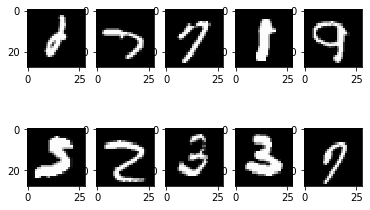

In [38]:
input_dim_size_input_1 = 784
layers = [784,512, 128, 10]
output_nodes_input_1 = 10

model_3 = nn_model_pytorch(layers)
model_3.nn_model()
criterion = nn2.CrossEntropyLoss()

miss_clas = run_model(model_3)

print_misclassified(miss_clas)

Number Of Images Tested = 8400

Model Accuracy = 0.9283333333333333
Number Of Images Tested = 8400

Model Accuracy = 0.9553571428571429
Number Of Images Tested = 8400

Model Accuracy = 0.9647619047619047
Number Of Images Tested = 8400

Model Accuracy = 0.9663095238095238
Number Of Images Tested = 8400

Model Accuracy = 0.9682142857142857
Number Of Images Tested = 8400

Model Accuracy = 0.9679761904761904
Number Of Images Tested = 8400

Model Accuracy = 0.975
Number Of Images Tested = 8400

Model Accuracy = 0.9729761904761904
Number Of Images Tested = 8400

Model Accuracy = 0.9704761904761905
Number Of Images Tested = 8400

Model Accuracy = 0.9717857142857143
Actual Value: 2
Predicted Value: 6
Actual Value: 9
Predicted Value: 1
Actual Value: 2
Predicted Value: 3
Actual Value: 5
Predicted Value: 8
Actual Value: 7
Predicted Value: 9
Actual Value: 4
Predicted Value: 8
Actual Value: 2
Predicted Value: 8
Actual Value: 2
Predicted Value: 8
Actual Value: 8
Predicted Value: 4
Actual Value: 2
Pr

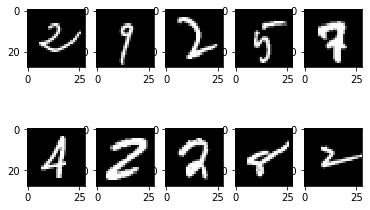

In [39]:
input_dim_size_input_1 = 784
layers = [784,512, 128, 64 , 10]
output_nodes_input_1 = 10

model_4 = nn_model_pytorch(layers)
model_4.nn_model()
criterion = nn2.CrossEntropyLoss()

miss_clas = run_model(model_4)

print_misclassified(miss_clas)

In [40]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

def test_label_predictions(model, test_loader):
    model.eval()
    actuals = []
    predictions = []
    with torch.no_grad():
        for data, target in test_loader:
            #data, target = data.to(device), target.to(device)
            output = model(data)
            prediction = output.argmax(dim=1, keepdim=True)
            actuals.extend(target.view_as(prediction))
            predictions.extend(prediction)
    return [i.item() for i in actuals], [i.item() for i in predictions]

actuals, predictions = test_label_predictions(model_3, test_loader)
print('Confusion matrix:')
conf_mat = confusion_matrix(actuals, predictions)
print(conf_mat)
print('F1 score: %f' % f1_score(actuals, predictions, average='micro'))
print('Accuracy score: %f' % accuracy_score(actuals, predictions))

classacc=list(range(0, 10))
for i in range(0,10):
    classacc[i] = conf_mat[i,i]/sum(conf_mat[i,:])
print(classacc)

Confusion matrix:
[[803   0   0   1   0   3   4   1   4   0]
 [  0 893   2   0   1   2   2   1   6   2]
 [  2   3 817   2   6   1   3   3   6   3]
 [  1   0   1 901   0  11   0   2  16   5]
 [  5   0   0   0 804   1   9   0   0  20]
 [  0   0   0   4   0 680   7   2   5   4]
 [  3   0   0   0   0   2 778   0   2   0]
 [  0   0   5   0   2   2   0 869   2  13]
 [  1   1   1   3   3   4   2   2 816   2]
 [  1   0   0   5   3   1   0   3   2 823]]
F1 score: 0.974286
Accuracy score: 0.974286
[0.9840686274509803, 0.9823982398239824, 0.9657210401891253, 0.9615795090715048, 0.9582836710369488, 0.9686609686609686, 0.9910828025477707, 0.973124300111982, 0.9772455089820359, 0.9821002386634845]


In [48]:
test_image_1 = test_data.loc[:,test_data.columns != "label"].values
test_dataset = torch.from_numpy(test_image_1).type(torch.FloatTensor)/255
print(test_image_1.shape)
new_test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 100, shuffle = False)

(28000, 784)


In [0]:
results = []
with torch.no_grad():
    model_3.eval()
    for images in new_test_loader:
        output = model_3(images)
        ps = torch.exp(output)
        top_p, top_class = ps.topk(1, dim = 1)
        results += top_class.numpy().tolist()

In [55]:
predictions = np.array(results).flatten()
print(predictions[:20])
print(predictions.shape)

final_output = pd.Series(predictions,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),final_output],axis = 1)

submission.to_csv("gdrive/My Drive/HW_1/output_submission.csv",index=False)

[2 0 9 9 3 7 0 3 0 3 5 7 4 0 4 3 3 1 9 0]
(28000,)
